<p align="center">
  <span style="color:Navy; font-size:200%; font-weight:bold; vertical-align:middle;">
    Temas Selectos: Python para Ciencias de la Tierra
  </span>
  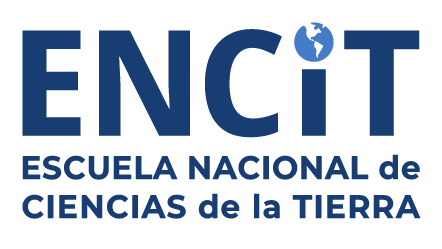
</p>
<p align="center" style="line-height:1.2;">
  <span style="color:RoyalBlue; font-size:160%;">Tema 4: Introducción al Aprendizaje Automático (Machine Learning) </span><br/>
  <span style="color:DodgerBlue; font-size:140%;"> Modelos supervisados: Regresión Lineal </span><br/>
  <span style="font-size:100%;color:forestgreen"> Escuela Nacional de Ciencias de la Tierra  |  Semestre 2026-I</span>
</p>

---




## **<font color="SeaGreen"> Pronostico de un índice de sequía </font>**

A lo largo de esta unidad estaremos construyendo modelos de machine learning para hacer un pronóstico estacional de sequía para un punto en el noroeste de México (lat = 29.725, lon = -109.725).


### Paso 0:   Plantear el problema

* ¿Cuál es el fenómeno físico que quiero estudiar?
    **El comportamiento de la sequía** 
* ¿Cuál es la variable dependiente?
   El SPI (Standardized Precipitation Index) —o Índice Estandarizado de Precipitación— es un indicador estadístico usado para medir las anomalías de precipitación (lluvia) en una región y período determinados. Su objetivo principal es cuantificar las condiciones de sequía o exceso de lluvia de manera estandarizada y comparable en el tiempo y el espacio.

    **La variable dependiente sera el SPI de 3 meses (que corresponde a una sequia meteorologica)**

* ¿Es una regresión o una clasificación? 



### Paso 1:  Datos 

* Obtener información diversa (¿Necesitamos muchos datos?).

    ¿Existen datos confiables que pueda usar?
    ¿Los datos tienen variedad?

* Remover información falsa, buscar/llenar valores faltantes… 

    Si no lleno los vacíos, el molodelo los aprenderá también.

  
### Paso 2:  Variables predictoras 
* Proponer variables “predictoras” 

* **Hacer un análisis estadístico de las variables propuestas.**

* Definir las variables de entrada.


> Las variables que estan relacionadas con las sequías son aquellas que afectan al ciclo hidrológico y que pueden causar un estrés hídrico. Una alteración en estas variables detonan reacciones en cadena conocidas como procesos de retroalimentación.

Las variables que se proponen (inicialmente) para hacer los modelos, y sus procedencias, son las siguientes:


|Variable                                     | Abreviacion  | Base de datos  |
|---------------------------------------------|--------------|----------------|
|Precipitación acumulada                      | pcp          | CHIRPS         |
|Radiación de onda larga saliente             | OLR          | NCEP-NCAR      |
|SSTs en la región de El Niño 3.4             | SST          | NOAA           |
|Volumen de agua en la primera capa del suelo | swvl1        | ERA-5 Land     |
|Temperatura en la superficie del suelo       | skt          | ERA-5 Land     |
|Altura geopotencial en 600mb                 | hgt          | NCEP-NCAR      |


### Paso 3:  Dividir la base de datos en 2 o 3 subcategorías 
* 70-85% para entrenar el modelo 

* 5-15% para validar/evaluar el modelo

* Probar el modelo


### Paso 4: Implementar el/los modelos disponibles.
Entrenar los modelos puede ser una tarea sencilla, pero hay que considerar ciertos parámetros (e hiperparámetros):	
* La función de costo
* El tipo de entrenamiento 
* La tasa de aprendizaje 

### Paso 5: Paso 5: Evaluación de modelos. 
Se debe evaluar los modelos tanto con los datos de entrenamiento como con los datos de prueba. 



<div class="alert alert-success">
    <b>Pasos 2 al 5 : <b> La misión en esta clase será implementar los modelos de regresión lineal.
</div>


### **<font color="SeaGreen"> Importar la base de datos </font>**

* Crea un DataFrame con los datos de `sequias_datos.csv` y muestra las primeras filas.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

import sklearn
from sklearn.neighbors import LocalOutlierFactor
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler 

from sklearn.decomposition import PCA


from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
# carga de archivo csv
df=pd.read_csv('sequias_datos.csv')
df.head()

In [ ]:
plt.figure()
sns.lineplot(x='Year',y='spi', data=df, markers='o')
plt.title('Serie de Tiempo de SPI en MAM en lat=29.725,lon=-109.725', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('SPI 3 meses', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
VariablesNumAnalis = [ 'spi', 'sst_mean_DJF', 'pcp_DJF', 'hgt_DJF', 'olr_DJF', 'skt_DJF', 'swvl1_DJF']

df_DEF = df[VariablesNumAnalis]
df_DEF.head()

### **<font color="SeaGreen"> Paso 2:  Variables predictoras  </font>**

En las clases pasadas hemos estado haciendo el análisis multivariado de los datos. Estos nos ha permitido saber cuáles son las variables con mayor potencial de funcionar para nuestros modelos. 
¿Recuerdan cuáles son? 

![spearman.png](spearman.png)
![pca.png](pca.png)


In [ ]:
# Vamos a crear varios modelos para ver cuál es mejor. 

# Primero, vamos a separar la variable de los años 
anios = df[['Year']].copy()

# Ahora vamos a proponer el primer modelo con un solo predictor
x_prep_1 = df_DEF[['pcp_DJF']].copy()

x_prep_2 = df_DEF[['olr_DJF']].copy()

x_prep_3 = df_DEF[['swvl1_DJF']].copy()

# Separamos la variable dependiente
y = df[['spi']].copy()

In [ ]:
#Escalamos los datos

scaler = StandardScaler()

x_scaled_1 = scaler.fit_transform(x_prep_1)
x1_scaled_df = pd.DataFrame(x_scaled_1, columns=x_prep_1.columns)

x_scaled_2 = scaler.fit_transform(x_prep_2)
x2_scaled_df = pd.DataFrame(x_scaled_2, columns=x_prep_2.columns)

x_scaled_3 = scaler.fit_transform(x_prep_3)
x3_scaled_df = pd.DataFrame(x_scaled_3, columns=x_prep_3.columns)

y_df_anios = y.copy()
y_df_anios['Year'] = anios

### **<font color="SeaGreen"> Paso 3:  Dividir la base de datos en 2 o 3 subcategorías  </font>**


In [ ]:
# Ahora hacemos la division de los datos 

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1_scaled_df, y, test_size=0.2, random_state=43)

X_train2, X_test2, y_train2, y_test2 = train_test_split(x2_scaled_df, y, test_size=0.2, random_state=43)

X_train3, X_test3, y_train3, y_test3 = train_test_split(x3_scaled_df, y, test_size=0.2, random_state=43)

### **<font color="SeaGreen"> Paso 4: Implementar el/los modelos disponibles. </font>**

Hoy vamos a usar regresiones lineales

Para mas informacion:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



In [ ]:
# Definimos el modelo, en este primer caso usaremos una regresion lineal 
rl1 = sklearn.linear_model.LinearRegression()
# Entrenamos el modelo
rl1.fit(X_train1,y_train1)


In [ ]:
# Predicciones con el conjunto de datos de entrenamiento
y1_pred_train = rl1.predict(X_train1) 

# Predicciones con el conjunto de datos de prueba
y1_pred_test = rl1.predict(X_test1)


In [ ]:
# Definimos el modelo, en este primer caso usaremos una regresion lineal 
rl2 = sklearn.linear_model.LinearRegression()
# Entrenamos el modelo
rl2.fit(X_train2,y_train2)

In [ ]:
# Predicciones con el conjunto de datos de entrenamiento
y2_pred_train = rl2.predict(X_train2) 

# Predicciones con el conjunto de datos de prueba
y2_pred_test = rl2.predict(X_test2)

In [ ]:
# Definimos el modelo, en este primer caso usaremos una regresion lineal 
rl3 = sklearn.linear_model.LinearRegression()
# Entrenamos el modelo
rl3.fit(X_train3,y_train3)

In [ ]:
# Predicciones con el conjunto de datos de entrenamiento
y3_pred_train = rl3.predict(X_train3) 

# Predicciones con el conjunto de datos de prueba
y3_pred_test = rl3.predict(X_test3)

### **<font color="SeaGreen"> Paso 5: Paso 5: Evaluación de modelos. </font>**

In [ ]:
#Creamos un DataFrame para ir guardando las evaluaciones de los modelos

perf_index={'R2':[],'MSE':[]}
ML_method=[]
df_pi=pd.DataFrame(perf_index, index=ML_method)
df_pi = df_pi.rename_axis('ML methods')



In [ ]:
y1_pred_train_df = pd.DataFrame(y1_pred_train,columns=['spi_train_predicted'])
y1_pred_test_df = pd.DataFrame(y1_pred_test, columns=['spi_test_predicted'])

#Evaluacion con el conjunto de datos de entrenamiento 
r2_score_train1 = metrics.r2_score(y_train1,y1_pred_train_df)
mean_squared_error_train1 = metrics.mean_squared_error(y_train1,y1_pred_train_df)
row_list=[r2_score_train1,mean_squared_error_train1]
df_pi.loc['RL entrenamiento con pcp']=row_list

#Evaluacion con el conjunto de datos de prueba
r2_score_test1 = metrics.r2_score(y_test1,y1_pred_test_df)
mean_squared_error_test1 = metrics.mean_squared_error(y_test1,y1_pred_test_df)

row_list=[r2_score_test1,mean_squared_error_test1]
df_pi.loc['RL prueba con pcp']=row_list
print(df_pi)


In [ ]:
df_predicted_vs_observed_train1 = y1_pred_train_df.copy()
df_predicted_vs_observed_train1['spi_observed'] = y_train1.copy()

plt.figure()
sns.scatterplot(x='spi_train_predicted', y='spi_observed', data = df_predicted_vs_observed_train1)
plt.plot([df_predicted_vs_observed_train1.min().min(), df_predicted_vs_observed_train1.max().max()],
         [df_predicted_vs_observed_train1.min().min(), df_predicted_vs_observed_train1.max().max()],
         linestyle='--', color='red')
plt.xlabel('spi predicho')
plt.ylabel('spi observado')
plt.title('SPI predicho vs observado con datos de entrenamiento y pcp')
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
df_predicted_vs_observed_test1 = y1_pred_test_df.copy()
df_predicted_vs_observed_test1['spi_observed'] = y_test1.copy()

plt.figure()
sns.scatterplot(x='spi_test_predicted', y='spi_observed', data = df_predicted_vs_observed_test1)
plt.plot([df_predicted_vs_observed_test1.min().min(), df_predicted_vs_observed_test1.max().max()],
         [df_predicted_vs_observed_test1.min().min(), df_predicted_vs_observed_test1.max().max()],
         linestyle='--', color='red')
plt.xlabel('spi predicho')
plt.ylabel('spi observado')
plt.title('SPI predicho vs observado con datos de prueba y pcp')
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
# Combinar predicciones con los años correspondientes
df_train_pred_rl1 = pd.DataFrame({'Year': X_train1.index.map(lambda i: y_df_anios.loc[i, 'Year']),
                              'spi_predicted': y1_pred_train_df.squeeze()})

df_test_pred_rl1 = pd.DataFrame({'Year': X_test1.index.map(lambda i: y_df_anios.loc[i, 'Year']),
                             'spi_predicted': y1_pred_test_df.squeeze()})

# Unir todo y ordenar cronológicamente
df_pred_total_rn1 = pd.concat([df_train_pred_rl1, df_test_pred_rl1])
df_pred_total_rn1 = df_pred_total_rn1.sort_values('Year').reset_index(drop=True)


plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['spi'], label='Observado', marker='o')
#sns.lineplot(x='Year',y='spi', data=df, markers='o')
plt.plot(df_pred_total_rn1['Year'], df_pred_total_rn1['spi_predicted'], label='Predicho rl1 pcp', marker='s')
plt.legend()
plt.xlabel('Año')
plt.ylabel('SPI')
plt.title('Serie temporal observada vs predicha')
plt.show()

In [ ]:
y2_pred_train_df = pd.DataFrame(y2_pred_train,columns=['spi_train_predicted'])
y2_pred_test_df = pd.DataFrame(y2_pred_test, columns=['spi_test_predicted'])

#Evaluacion con el conjunto de datos de entrenamiento 
r2_score_train2 = metrics.r2_score(y_train2,y2_pred_train_df)
mean_squared_error_train2 = metrics.mean_squared_error(y_train2,y2_pred_train_df)
row_list=[r2_score_train2,mean_squared_error_train2]
df_pi.loc['RL entrenamiento con olr']=row_list

#Evaluacion con el conjunto de datos de prueba
r2_score_test2 = metrics.r2_score(y_test2,y2_pred_test_df)
mean_squared_error_test2 = metrics.mean_squared_error(y_test2,y2_pred_test_df)

row_list=[r2_score_test2,mean_squared_error_test2]
df_pi.loc['RL prueba con olr']=row_list
print(df_pi)

In [ ]:
df_predicted_vs_observed_train2 = y2_pred_train_df.copy()
df_predicted_vs_observed_train2['spi_observed'] = y_train2.copy()

plt.figure()
sns.scatterplot(x='spi_train_predicted', y='spi_observed', data = df_predicted_vs_observed_train2)
plt.plot([df_predicted_vs_observed_train2.min().min(), df_predicted_vs_observed_train2.max().max()],
         [df_predicted_vs_observed_train2.min().min(), df_predicted_vs_observed_train2.max().max()],
         linestyle='--', color='red')
plt.xlabel('spi predicho')
plt.ylabel('spi observado')
plt.title('SPI predicho vs observado con datos de entrenamiento y olr')
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
df_predicted_vs_observed_test2 = y2_pred_test_df.copy()
df_predicted_vs_observed_test2['spi_observed'] = y_test2.copy()

plt.figure()
sns.scatterplot(x='spi_test_predicted', y='spi_observed', data = df_predicted_vs_observed_test2)
plt.plot([df_predicted_vs_observed_test2.min().min(), df_predicted_vs_observed_test2.max().max()],
         [df_predicted_vs_observed_test2.min().min(), df_predicted_vs_observed_test2.max().max()],
         linestyle='--', color='red')
plt.xlabel('spi predicho')
plt.ylabel('spi observado')
plt.title('SPI predicho vs observado con datos de prueba y olr')
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
# Combinar predicciones con los años correspondientes
df_train_pred_rl2 = pd.DataFrame({'Year': X_train2.index.map(lambda i: y_df_anios.loc[i, 'Year']),
                              'spi_predicted': y2_pred_train_df.squeeze()})

df_test_pred_rl2 = pd.DataFrame({'Year': X_test2.index.map(lambda i: y_df_anios.loc[i, 'Year']),
                             'spi_predicted': y2_pred_test_df.squeeze()})

# Unir todo y ordenar cronológicamente
df_pred_total_rn2 = pd.concat([df_train_pred_rl2, df_test_pred_rl2])
df_pred_total_rn2 = df_pred_total_rn2.sort_values('Year').reset_index(drop=True)


plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['spi'], label='Observado', marker='o')
#sns.lineplot(x='Year',y='spi', data=df, markers='o')
plt.plot(df_pred_total_rn1['Year'], df_pred_total_rn1['spi_predicted'], label='Predicho rl1 pcp', marker='s')
plt.plot(df_pred_total_rn2['Year'], df_pred_total_rn2['spi_predicted'], label='Predicho rl2 olr', marker='s')
plt.legend()
plt.xlabel('Año')
plt.ylabel('SPI')
plt.title('Serie temporal observada vs predicha')
plt.show()

In [ ]:
y3_pred_train_df = pd.DataFrame(y3_pred_train,columns=['spi_train_predicted'])
y3_pred_test_df = pd.DataFrame(y3_pred_test, columns=['spi_test_predicted'])

#Evaluacion con el conjunto de datos de entrenamiento 
r2_score_train3 = metrics.r2_score(y_train3,y3_pred_train_df)
mean_squared_error_train3 = metrics.mean_squared_error(y_train3,y3_pred_train_df)
row_list=[r2_score_train3,mean_squared_error_train3]
df_pi.loc['RL entrenamiento con swvl']=row_list

#Evaluacion con el conjunto de datos de prueba
r2_score_test3 = metrics.r2_score(y_test3,y3_pred_test_df)
mean_squared_error_test3 = metrics.mean_squared_error(y_test3,y3_pred_test_df)

row_list=[r2_score_test3,mean_squared_error_test3]
df_pi.loc['RL prueba con swvl']=row_list
print(df_pi)

In [ ]:
df_predicted_vs_observed_train3 = y3_pred_train_df.copy()
df_predicted_vs_observed_train3['spi_observed'] = y_train3.copy()

plt.figure()
sns.scatterplot(x='spi_train_predicted', y='spi_observed', data = df_predicted_vs_observed_train3)
plt.plot([df_predicted_vs_observed_train3.min().min(), df_predicted_vs_observed_train3.max().max()],
         [df_predicted_vs_observed_train3.min().min(), df_predicted_vs_observed_train3.max().max()],
         linestyle='--', color='red')
plt.xlabel('spi predicho')
plt.ylabel('spi observado')
plt.title('SPI predicho vs observado con datos de entrenamiento y swvl')
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
df_predicted_vs_observed_test3 = y3_pred_test_df.copy()
df_predicted_vs_observed_test3['spi_observed'] = y_test3.copy()

plt.figure()
sns.scatterplot(x='spi_test_predicted', y='spi_observed', data = df_predicted_vs_observed_test3)
plt.plot([df_predicted_vs_observed_test3.min().min(), df_predicted_vs_observed_test3.max().max()],
         [df_predicted_vs_observed_test3.min().min(), df_predicted_vs_observed_test3.max().max()],
         linestyle='--', color='red')
plt.xlabel('spi predicho')
plt.ylabel('spi observado')
plt.title('SPI predicho vs observado con datos de prueba y swvl')
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
# Combinar predicciones con los años correspondientes
df_train_pred_rl3 = pd.DataFrame({'Year': X_train3.index.map(lambda i: y_df_anios.loc[i, 'Year']),
                              'spi_predicted': y3_pred_train_df.squeeze()})

df_test_pred_rl3 = pd.DataFrame({'Year': X_test3.index.map(lambda i: y_df_anios.loc[i, 'Year']),
                             'spi_predicted': y2_pred_test_df.squeeze()})

# Unir todo y ordenar cronológicamente
df_pred_total_rn3 = pd.concat([df_train_pred_rl3, df_test_pred_rl3])
df_pred_total_rn3 = df_pred_total_rn3.sort_values('Year').reset_index(drop=True)


plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['spi'], label='Observado', marker='o')
#sns.lineplot(x='Year',y='spi', data=df, markers='o')
plt.plot(df_pred_total_rn1['Year'], df_pred_total_rn1['spi_predicted'], label='Predicho rl1 pcp', marker='s')
plt.plot(df_pred_total_rn2['Year'], df_pred_total_rn2['spi_predicted'], label='Predicho rl2 olr', marker='s')
plt.plot(df_pred_total_rn3['Year'], df_pred_total_rn3['spi_predicted'], label='Predicho rl2 swvl', marker='s')
plt.legend()
plt.xlabel('Año')
plt.ylabel('SPI')
plt.title('Serie temporal observada vs predicha')
plt.show()

In [ ]:
df_pi

---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio 1 : ¿Se pueden mejorar estos modelos?  </font>**

<font color="DarkBlue"> Sí, podemos agregar más predictores para ver si con más características hay un mejor ajuste. Entonces: Entrena los modelos ahora considerando 2 predictores (si da tiempo, intenten con 3 o 4 predictores).


---

---

### **<font color="DodgerBlue"> Ejercicio 2 </font>**
    
<font color="DarkBlue"> Obten la regresión lineal del PM10 considerando las variables predictoras más importantes. 

---

<div class="alert alert-block alert-warning">
    <b>Nota: <b> En este caso tambien deben estandarizar la variable dependiente (PM10), y despues de hacer las predicciones, deben des-estandarizar los datos `.inverse_transform(.reshape(-1, 1))`
</div>
